# AUDIO FEATURES 

In [26]:
import librosa
import numpy as np
audio_data = 'C:\\Data\\2_Preprocesamiento\\Pruebas_5\\1-Amazona_farinosa\\BSA-1535-02.wav'
x , sr = librosa.load(audio_data)
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(36221,) 22050


In [5]:
librosa.load(audio_data, sr=None)

(array([ 1.7395020e-03,  7.3242188e-04,  1.8005371e-03, ...,
        -1.9836426e-04, -7.6293945e-05,  1.3427734e-03], dtype=float32), 44100)

In [6]:
import IPython.display as ipd
ipd.Audio(audio_data)

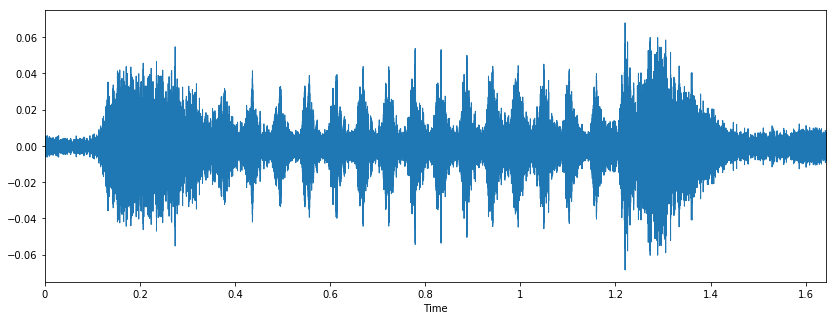

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

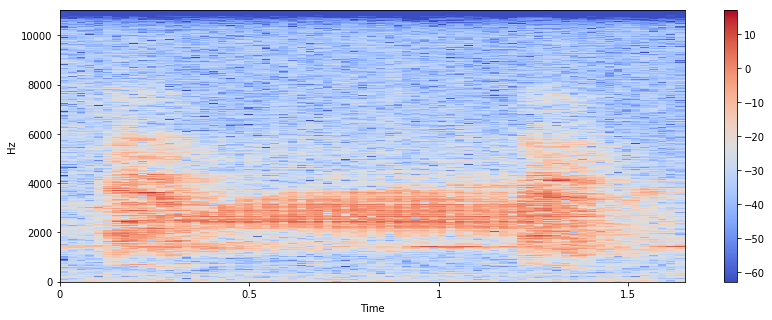

In [8]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

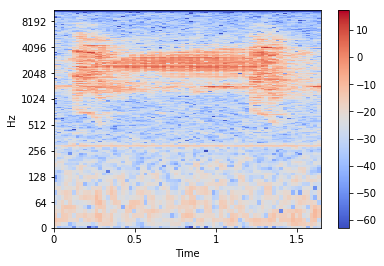

In [9]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [30]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
print (np.mean(spectral_centroids))

3187.3523770308384


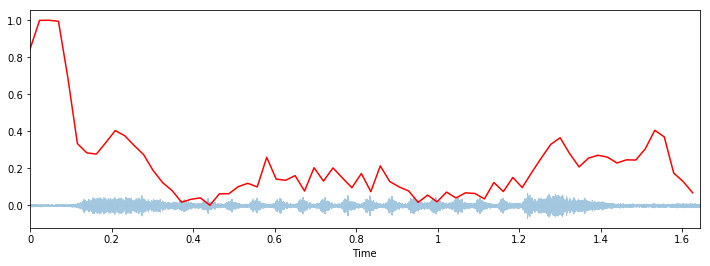

In [38]:
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

In [32]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
print(np.mean(spectral_rolloff))

4156.818056778169


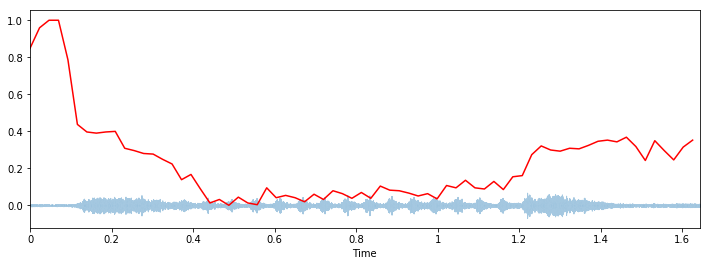

In [39]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

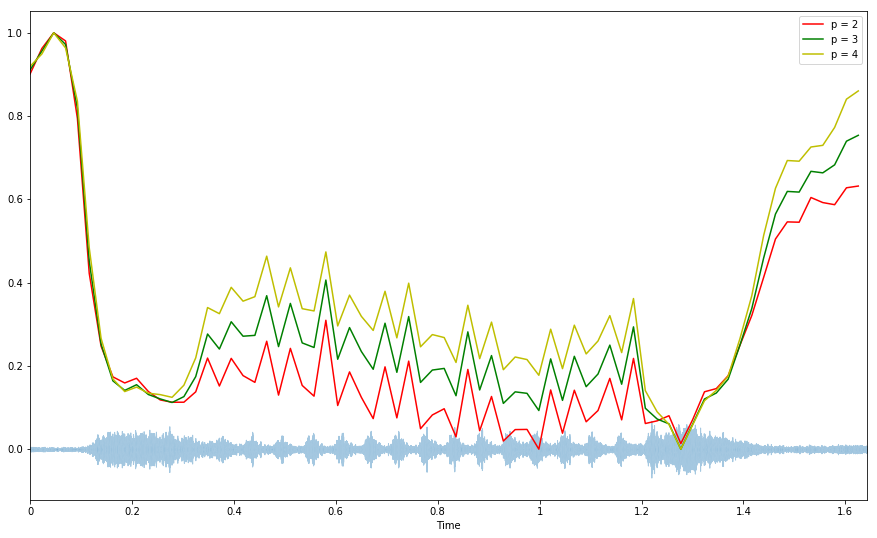

In [15]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

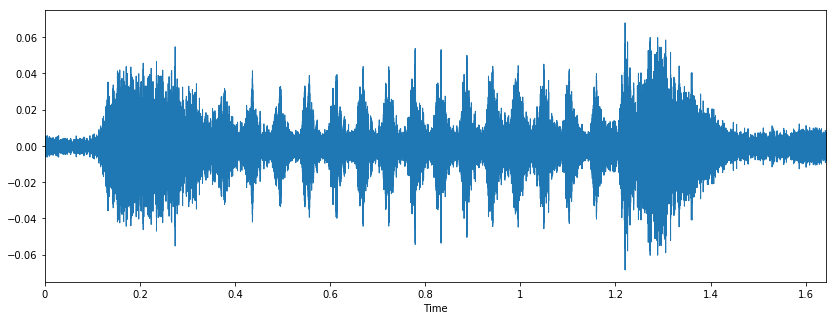

In [16]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

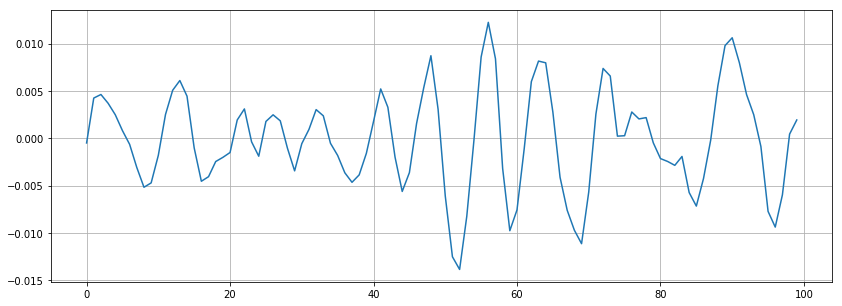

In [17]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [40]:
zero_crossings = librosa.zero_crossings(x, pad=False)
print(np.mean(zero_crossings))

0.2530576185086


-17.63440121573522


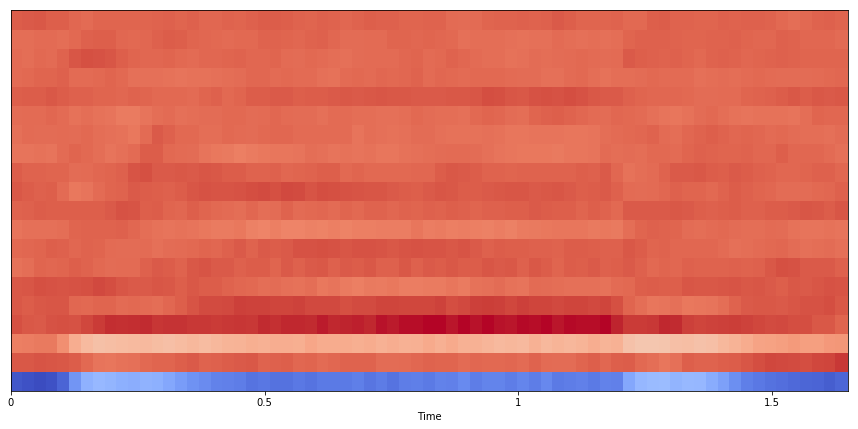

In [36]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(np.mean(mfccs))
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

0.3824240951885756


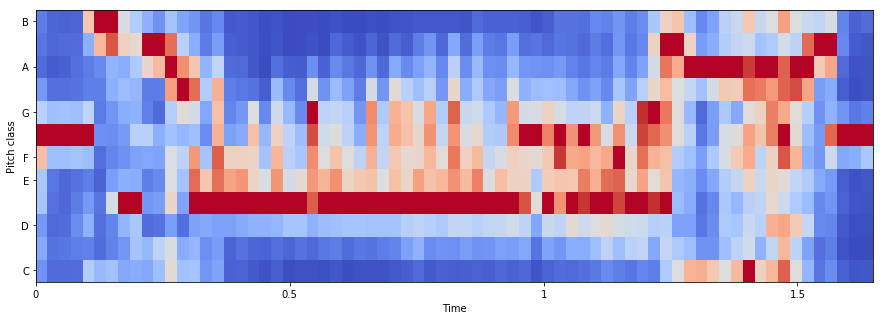

In [37]:
chromagram = librosa.feature.chroma_stft(x, sr=sr)
print(np.mean(chromagram))
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')

In [48]:
librosa.feature.rmse(y=x)

array([[0.00191197, 0.00184325, 0.00181269, 0.00207623, 0.00506414,
        0.00912451, 0.01244725, 0.01439563, 0.01590056, 0.01607633,
        0.0154537 , 0.01471784, 0.01370075, 0.01168383, 0.01009199,
        0.00998759, 0.00815959, 0.00954428, 0.00904688, 0.00810141,
        0.00952225, 0.00754394, 0.00964974, 0.00948597, 0.00826093,
        0.01065132, 0.00860938, 0.01081639, 0.01098006, 0.01011101,
        0.01129697, 0.00897606, 0.01157236, 0.01059191, 0.01174285,
        0.01213376, 0.01041933, 0.01217933, 0.00989535, 0.01229423,
        0.01175108, 0.01237704, 0.01284311, 0.01097683, 0.01222826,
        0.00963537, 0.01107587, 0.01029566, 0.00971407, 0.01018701,
        0.00800284, 0.01170028, 0.0123538 , 0.01533917, 0.01869703,
        0.01864038, 0.01854332, 0.01688636, 0.01342815, 0.01069583,
        0.008725  , 0.00626877, 0.00489625, 0.0036752 , 0.00326378,
        0.00310575, 0.00312072, 0.00354661, 0.00392696, 0.00417025,
        0.00450686]], dtype=float32)

0.009893678


In [50]:
S, phase = librosa.magphase(librosa.stft(x))
rmse = librosa.feature.rmse(S=S)

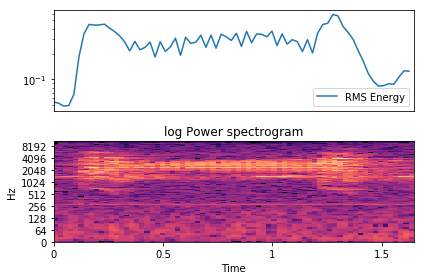

In [52]:
plt.figure()
plt.subplot(2, 1, 1)
plt.semilogy(rmse.T, label='RMS Energy')
plt.xticks([])
plt.xlim([0, rmse.shape[-1]])
plt.legend()
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),y_axis='log', x_axis='time')
plt.title('log Power spectrogram')
plt.tight_layout()

In [53]:
y, sr = librosa.load(audio_data)
librosa.feature.melspectrogram(y=y, sr=sr)

array([[2.77660588e-03, 1.32645382e-03, 2.29938712e-03, ...,
        3.08316777e-03, 6.27413199e-03, 1.78844523e-03],
       [8.55674935e-04, 4.70134778e-04, 2.39369051e-03, ...,
        1.95962046e-03, 6.01807122e-03, 2.46819344e-03],
       [2.16974517e-04, 4.85508731e-04, 9.81313894e-04, ...,
        5.25123279e-04, 4.98728156e-04, 7.38006814e-04],
       ...,
       [1.66344291e-05, 1.70422798e-05, 1.66418016e-05, ...,
        1.33265412e-05, 1.93683926e-05, 2.42364228e-05],
       [5.23116692e-06, 6.42220590e-06, 7.83215295e-06, ...,
        5.47401894e-06, 7.34978603e-06, 6.68430375e-06],
       [1.33416458e-06, 1.08195422e-06, 1.17648319e-06, ...,
        4.70780586e-07, 5.23632478e-07, 3.59853405e-07]])

In [54]:
D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=D, sr=sr)

In [55]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,
                                     fmax=8000)

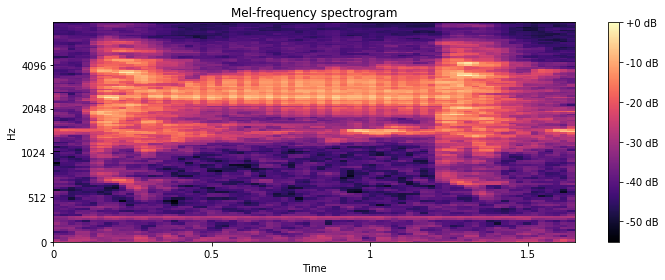

In [56]:
plt.figure(figsize=(10, 4))
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',
                          y_axis='mel', sr=sr,
                          fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()